In [1]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [2]:
%matplotlib inline
import numpy.ma as ma
from numpy import isfinite



import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [4]:
cd /

/


In [5]:
cd Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [6]:
DataKarpos = pd.read_csv('Target.csv') # Only Karpos Location is used here . Other locations are zero

In [7]:
DataKarpos[1:2]

,Unnamed: 0,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,...,daysInterval,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
1,10,2007-01-02 00:00:00,0.950396,Karpos,1,0.33293,1,NaN,0,-0.094688,...,0 days 00:00:00.000000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
TargetKarpos = DataKarpos[['PM10']].copy(deep=True) # copy PM10 data out from data sets

# Analysis Of Misiing Values

In [9]:
Target = DataKarpos[['PM10']].copy(deep=True)

In [10]:
Target.shape

(89500, 1)

In [11]:
null_data_PM10 = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [12]:
null_data_PM10.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [13]:
null_data_PM10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28871 entries, 168 to 86692
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 451.1 KB


In [14]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [15]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.078455
std,0.851036
min,-0.875321
25%,NaN
50%,NaN
75%,NaN
max,9.045878


In [16]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [17]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [18]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [19]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    32.258101
dtype: float64

In [20]:
Target[168:215].info() # we see that we have 47 entries in a row that are null. We will therefore drop this to assist the model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 168 to 214
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 460.0 bytes


In [21]:
Target.drop(Target.index[168:215],inplace=True);


In [22]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89453 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 1.4 MB


In [23]:
Target.shape

(89453, 1)

In [24]:
Target[337:361].info() # 24 entries in a row are null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 384 to 407
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [25]:
Target.drop(Target.index[337:361],inplace=True);

In [26]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.078455
std,0.851036
min,-0.875321
25%,NaN
50%,NaN
75%,NaN
max,9.045878


In [27]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89429 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 1.4 MB


In [28]:
Target[961:984].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1032 to 1054
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [29]:
Target.drop(Target.index[961:984],inplace=True);

In [30]:
Target[1082:1105].info() # 23 consecutive nana values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1176 to 1198
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [31]:
Target.drop(Target.index[1082:1105],inplace=True)

In [32]:
Target[1088:1106].info() # 18 entries null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1205 to 1222
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [33]:
Target.drop(Target.index[1088:1106],inplace=True)

In [34]:
Target[1569:1593].info()# 24 consecutive entries missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1704 to 1727
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [35]:
Target.drop(Target.index[1569:1593],inplace=True)

In [36]:
Target[1689:1705].info()# 16 consecutive entries missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1848 to 1863
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 256.0 bytes


In [37]:
Target.drop(Target.index[1689:1705],inplace=True)

In [38]:
Target[2272:2296].info()# 24 consecutive entries missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 2447 to 2470
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [39]:
Target.drop(Target.index[2272:2296],inplace=True)# 16 consecutive entries missing

In [40]:
Target[3470:3592].info()# 24 consecutive entries missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 3669 to 3790
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 1.9 KB


In [41]:
Target.drop(Target.index[3470:3592],inplace=True)# 122 consecutive entries missing

In [42]:
Target[7493:7861].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 7814 to 8181
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 5.8 KB


In [43]:
Target[16707:35423].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18716 entries, 17028 to 35743
Data columns (total 1 columns):
PM10    264 non-null float64
dtypes: float64(1)
memory usage: 292.4 KB


In [44]:
Target.drop(Target.index[16707:35423],inplace=True)# 122 consecutive entries missing

In [45]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60365.000000
mean,-0.078569
std,0.852256
min,-0.875321
25%,NaN
50%,NaN
75%,NaN
max,9.045878


In [46]:
Target[16810:17523].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 35847 to 36559
Data columns (total 1 columns):
PM10    96 non-null float64
dtypes: float64(1)
memory usage: 11.1 KB


In [47]:
Target.drop(Target.index[16810:17523],inplace=True)# 122 consecutive entries missing

In [48]:
Target[51008:79900].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18742 entries, 70758 to 89499
Data columns (total 1 columns):
PM10    18008 non-null float64
dtypes: float64(1)
memory usage: 292.8 KB


In [49]:
print("Percentage of Missing Value: "); getPctMissing(Target) # Reduced percentage of missingvalues

Percentage of Missing Value: 


PM10    13.592832
dtype: float64

# Data After Cleaning

In [50]:
Target = Target.reset_index(drop=True)

In [51]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69750 entries, 0 to 69749
Data columns (total 1 columns):
PM10    60269 non-null float64
dtypes: float64(1)
memory usage: 545.0 KB


In [52]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    9481
dtype: int64

In [53]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60269
dtype: int64

# Dealing With Missing Values

<p> In this session we fill missing value with the local mean before passind the values into the tensorflow computational graph </p>

In [54]:
#Target.fillna(0,inplace=True) # Fill Missing value with 0. Default model

In [55]:
Target_list = Target.values.tolist() # create a list of values for use in data model

# Prepare Data 

In [56]:
counter=0
def dataGetter(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter;
    assert type(datalist) == list;
    
    
    value = datalist[counter]
    #print(counter)


    counter = counter +1
             
    return np.array([value])

In [57]:
# Define window size or learning
sliding_window = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window.append(dataGetter(Target_list))

In [59]:
#from numpy import isnan

#k =  ~isnan(test) * ~isnan(test)

In [60]:
result = isfinite(test) * isfinite(test)
np.count_nonzero(~result)


1

In [66]:
def get_pair(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    global sliding_window
    sliding_window.append(dataGetter(Target))
    #print(len(sliding_window))
    
    input_value = sliding_window[0:24]
    
    input_value=np.array(input_value)
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,24))
    ##print(input_value)
    output_value = sliding_window[-1]
    ##print(output_value)
    sliding_window = sliding_window[1:]
    #print(len(sliding_window))
    return input_value, output_value

In [67]:
len(sliding_window)

24

#Input Params
input_dim = 1
 
#To maintain state
last_value = np.array([0 for i in range(input_dim)])
last_derivative = np.array([0 for i in range(input_dim)])
 
def get_total_input_output(Target):
    """
    Get Total feed vector - input and output 
    """
    global last_value, last_derivative
    raw_i, raw_o = get_pair(Target)
    raw_i = raw_i[0]
    l1 = list(raw_i)
    derivative = raw_i - last_value
    l2 = list(derivative)
    last_value = raw_i
    l3 = list(derivative - last_derivative)
    last_derivative = derivative
    return np.array([l1 + l2 + l3]), raw_o

# Build Model

In [68]:
#Imports
import tensorflow as tf
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *


In [69]:
#Input Params
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    input_layer = tf.placeholder(tf.float32, [1, input_dim*24],name="input_data")
    correct_output = tf.placeholder(tf.float32, [1, input_dim],name="target_data")

In [70]:
###inistate = tf.Variable(lstm_cell_with_dropout.zero_state(BATCH_SIZE, tf.float32), trainable=False)

In [71]:
with tf.name_scope("lstmLayer"):    
    lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*24,state_is_tuple=False)
    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(input_layer, lstm_state1)
    #The LSTM state will get updated
    lstm_update_op1 = lstm_state1.assign(lstm_state_output1)

In [72]:
lstm_output1.get_shape() # verify shape

TensorShape([Dimension(1), Dimension(24)])

In [73]:
with tf.name_scope("weight_Bias_learning_rate"):
    global_step = tf.Variable(0, trainable=False,name="global_step")
    starter_learning_rate = 0.007
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1000, 0.1, staircase=False,name ="Exponential_decay")
    ##The Regression-Output Layer
    #The Weights and Biases matrices first
    output_W1 = tf.Variable(tf.truncated_normal([input_dim*24, input_dim]),name="weight")
    output_b1 = tf.Variable(tf.zeros([input_dim]),name="bias")
    

In [74]:
with tf.name_scope("prediction"):
    #Compute the output
    final_output = tf.matmul(lstm_output1, output_W1) + output_b1

In [75]:
final_output.get_shape() # verify output shape

TensorShape([Dimension(1), Dimension(1)])

In [76]:
output_W1 # verify weight shape

In [77]:
with tf.name_scope("RMS_error"):
    ##Calculate the Sum-of-Squares Error
    error = tf.pow(tf.sub(final_output, correct_output), 2)

In [78]:
#error = tf.reshape(error,(1,))

In [79]:
with tf.name_scope("optimizer"):
    ##The Optimizer
    #Adam works best
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

In [80]:
# Create a summary to monitor MSE
mse=tf.summary.tensor_summary("errors_Summary",error)
# Create a summary to monitor  predictions
prediction=tf.summary.tensor_summary("predictions_Summmary", final_output)
# Create a summary to monitor bias
bias_vec=tf.summary.tensor_summary("bias", output_b1)
# create sumary
#rate_vec=tf.summary.scalar("rate", learning_rate)


#histogram plot

error_stats=tf.histogram_summary("errors_Histogram",error)
weight_stats=tf.histogram_summary("weights_Histogram",output_W1)
bias_stats=tf.histogram_summary("biases_Histogram",output_b1)
#learning_stats=tf.histogram_summary("biases_Histogram",learning_rate)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.merge_summary([mse,prediction,bias_vec,error_stats,weight_stats,bias_stats])

In [81]:
##Session
sess = tf.Session()
#Initialize all Variables
#sess.run(tf.initialize_all_variables())


In [82]:
len(Target_list)

69750

# Evaluation Data set

In [83]:
logs_path = '/Users/Seychelles/Desktop/GoogleTensorflow/finals/tensorboardData/local_mean/'

In [84]:
##Training Parameters
n_iter = 60000 
inner_iter = 6000
actual_output1 = []
network_output1 = []
validation_prediction=[];
validation_target =[];
lower_bound=0;
upper_bound=800;
prediction_window=800

In [85]:
len(Target_list)

69750

In [86]:
import copy
#new_list = copy.deepcopy(old_list)
Test_eval=copy.deepcopy(Target_list[60001:])

In [87]:
len(Test_eval)

9749

In [88]:
len(Target_list)-n_iter

9750

In [89]:
# We have 500000 iterations
# Between itertions and every 5000 steps we make all initial_state = 0 and  cross-validate
# We have 19 validation set
# We test with the remainder 
Remainder = len(Test_eval) - ((n_iter/inner_iter)*prediction_window)

In [90]:
Remainder = int(Remainder)

In [91]:
Remainder

1749

In [101]:
init = tf.initialize_all_variables()
error_=[]
#k=[]#------check
flexible=24
non_nan_value_count = []
sess = tf.Session()

with tf.Session() as sess:
    sess.run(init)


    writer = tf.train.SummaryWriter(logs_path, graph= tf.get_default_graph()) 

    counter =0 
    assert counter==0

    for i in range(n_iter):
        input_v, output_v = get_pair(Target_list)
        
        nan_boolean = isfinite(input_v) * isfinite(input_v)
        nan_counter = np.count_nonzero(~nan_boolean)
        non_nan_value_count.append(nan_counter);
        #k.append(input_v)#----check
        if nan_counter < flexible:
            #print(input_v)----check
            input_mean = np.nanmean(input_v, axis=1)
            #print(input_mean)----check
            input_v=np.where(np.isnan(input_v), ma.array(input_v, mask=np.isnan(input_v)).mean(axis=1), input_v)  
            #print(input_v)------check
        #output_v =np.nan
        if np.isnan(output_v)==True:
            #assert(True)---check
            output_v= input_mean;
            #print(output_v)
            output_v = output_v.reshape(1,1)
            
        
        #break;----uncomment to check
        if  nan_counter < flexible:
            _, _, network_output,errors,summary = sess.run([lstm_update_op1,
                                     train_step,
                                     final_output,error,merged_summary_op],
                                    feed_dict = {
                                        input_layer: input_v,
                                        correct_output: output_v})
            writer.add_summary(summary)
            error_.append(errors)
            if i%inner_iter==0 & i!=0:
                assert i!=0;
                sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))
        
                for j in range(len(Test_eval[lower_bound:upper_bound])):
                    input_val, output_val = get_pair(Test2)
                    _, network_output = sess.run([lstm_update_op1,
                                      final_output],
                                     feed_dict = {
                                     input_layer: input_val,
                                     correct_output: output_val})
                    lower_bound= lower_bound+prediction_window;
                    upper_bound = upper_bound + prediction_window;
                    validation_target.append(output_val)
                    validation_prediction.append(network_output1)
        #sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))

            actual_output1.append(output_v)
            #actual_output2.append(output_v[0][1])
            network_output1.append(network_output)
            #network_output2.append(network_output[0][1])
            #x_axis.append(i)
        else:
            continue
                
        
 
    ############Testing ##########
    sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))
    actual_output_test = []
    network_output_test = []
    counter=0
    #sliding_window=[]
    #print(len(sliding_window))
    #sliding_window.pop()
    #print(len(sliding_window))
    ki=[]
    for i in range(len(Test_eval[-Remainder:])):
        ki.append(i)
        input_val, output_val = get_pair(Test_eval[-Remainder:])
        #input_mean = np.nanmean(input_val, axis=1)
        nan_boolean = isfinite(input_val) * isfinite(input_val)
        nan_counter = np.count_nonzero(~nan_boolean)
        #print(output_val)
        #k.append(input_v)#----check
        if nan_counter < flexible:
            #print(input_v)----check
            input_mean = np.nanmean(input_val, axis=1)
            #print(input_mean)----check
            input_val=np.where(np.isnan(input_val), ma.array(input_val, mask=np.isnan(input_val)).mean(axis=1), input_val)  
            #print(input_v)------check
        #output_v =np.nan
        if np.isnan(output_val)==True:
            #assert(True)---check
            output_val= input_mean;
            #print(output_v)
            output_val = output_val.reshape(1,1)
        #break;----uncomment to check
        if nan_counter < flexible:
            _, network_output2 = sess.run([lstm_update_op1,final_output],feed_dict = { input_layer: input_val,correct_output: output_val})
            network_output_test.append(network_output2)
            actual_output_test.append(output_val)
        else:
            continue

In [96]:
int(len(Test_eval[-Remainder:]))

1749

In [94]:
ki

[0]

In [ ]:
x=np.array([1,2,3,4,5,6,np.nan])

In [ ]:
x = x.reshape(1,7)

In [ ]:
np.nanmean(a, axis=1)

# Errors Plot

In [102]:
errorplot = np.array(error_)

In [103]:
errorplot.shape

(53209, 1, 1)

In [105]:
errorplot = errorplot.reshape(53209,1)

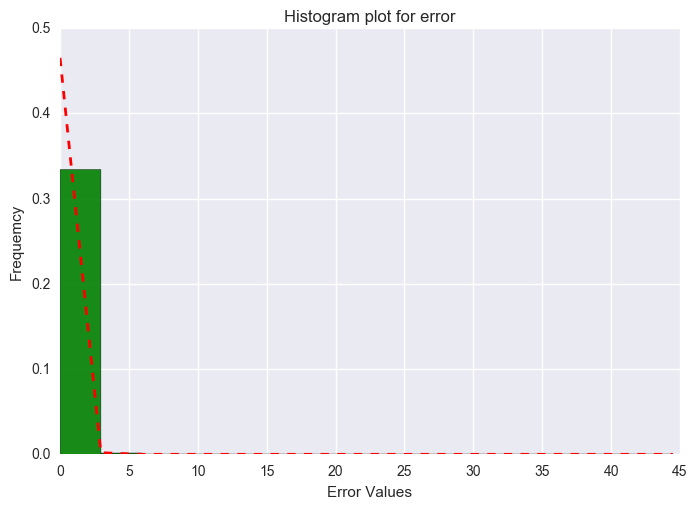

In [106]:
import matplotlib.mlab as mlab

#fig, ax = plt.subplots()
n, bins, patches=plt.hist(errorplot,15,normed=1,facecolor='green',alpha=0.9)
mu= np.mean(errorplot);sigma=np.std(errorplot);
y = mlab.normpdf( bins,mu,sigma)
#y = mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error")
plt.ylabel("Frequemcy")
plt.xlabel("Error Values")
plt.show()

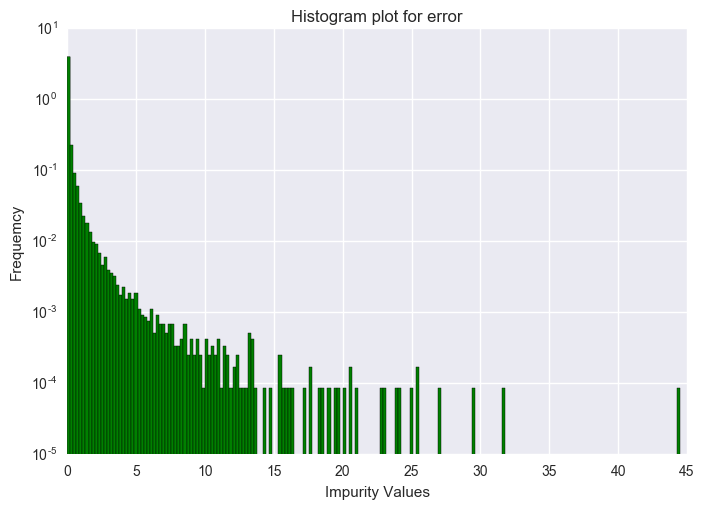

In [107]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()
plt.hist(errorplot,bins=200,normed=1,facecolor='green')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error")
plt.ylabel("Frequemcy")
plt.xlabel("Impurity Values")
plt.show()

# Extract Date in the series

In [118]:
from matplotlib.dates  import  date2num
Data = pd.read_csv('ItemListWithDummy.csv')

In [119]:
pd.to_datetime(Data.date);

In [120]:
x_axis = Data['date']

In [121]:
x_axis = pd.to_datetime(x_axis)

In [122]:
#80000-len(network_output1)

In [558]:
network = np.array(network_output1)

In [559]:
actual= np.array(actual_output1)

In [560]:
actual.shape

(60071, 1, 1)

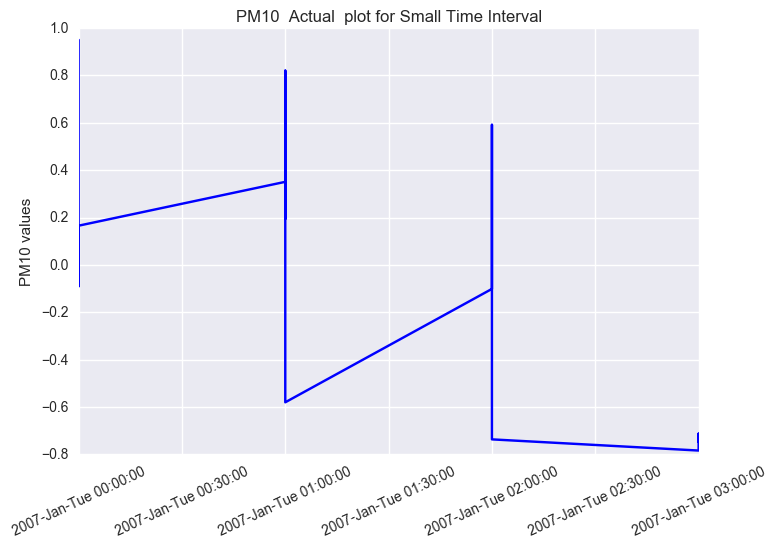

In [561]:
import matplotlib.pyplot 
import matplotlib.dates




fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot_date(x_axis[0:48], actual.reshape(60071,1)[0:48], 'b-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
#plt.tight_layout()
plt.ylabel("PM10 values")
plt.title("PM10  Actual  plot for Small Time Interval")
plt.show()

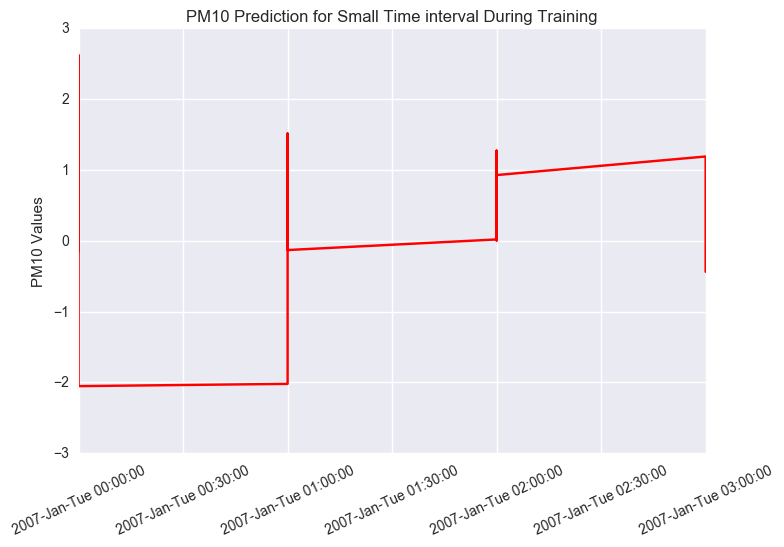

In [562]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:48], network.reshape(60071,1)[0:48], 'r-')

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 Values")
plt.title("PM10 Prediction for Small Time interval During Training")
plt.show()

# Plots predictions during Training

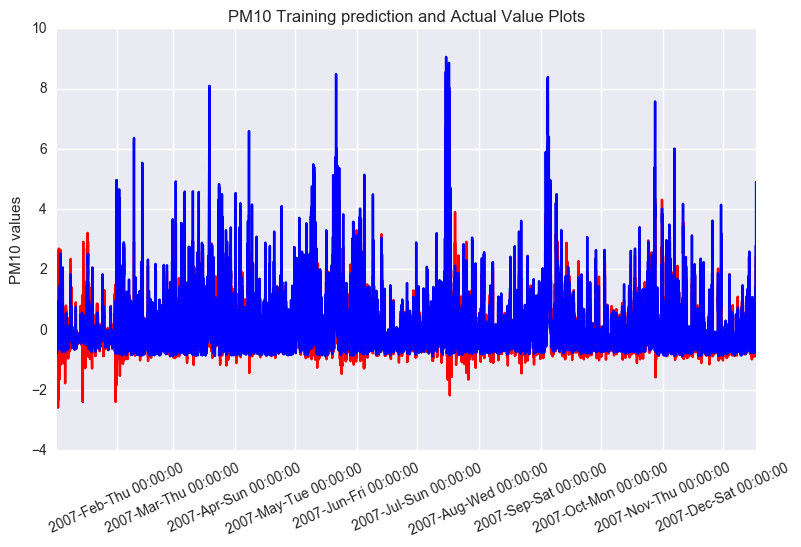

In [564]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:60071], network.reshape(60071,1)[0:60071], 'r-')
ax.plot_date(x_axis[0:60071], actual.reshape(60071,1)[0:60071], 'b-')


#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 values")
plt.title("PM10 Training prediction and Actual Value Plots")
plt.show()

# Model Testing Plot

In [97]:
#Reset counter
counter = 0

In [109]:
sess.run

<bound method BaseSession.run of <tensorflow.python.client.session.Session object at 0x122ab7b00>>

In [ ]:
# Testing plot

In [108]:
actual_output_test[-48:];

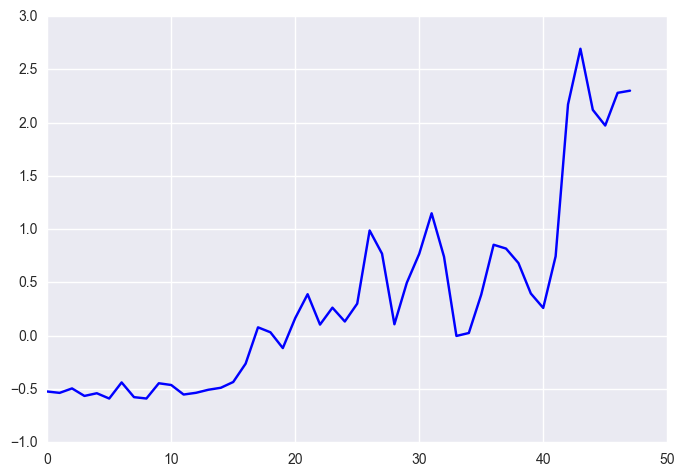

In [109]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(actual_output_test[-48:]).reshape(48,1), 'b-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

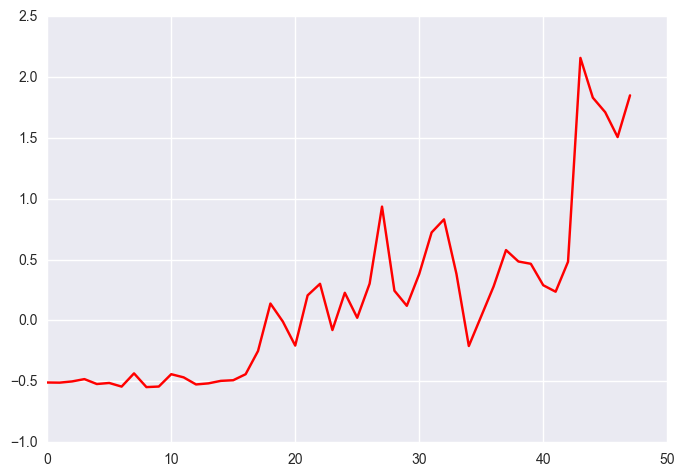

In [110]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test[-48:]).reshape(48,1), 'r-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

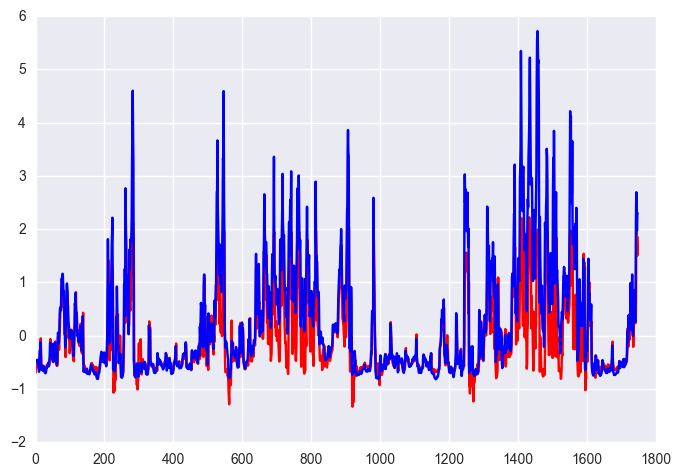

In [111]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(len(network_output_test),1), 'r-')
ax.plot( np.array(actual_output_test).reshape(len(actual_output_test),1), 'b-')

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

# Smooth Plot

In [112]:
from scipy.interpolate import interp1d


In [113]:
xn_ax = np.linspace(0,48,48*2)



In [114]:
x_ax = np.linspace(0,50,48)
y_cor=np.array(network_output_test[-48:]).reshape(48,1)

In [115]:
y_cor=np.reshape(y_cor,(48))

In [116]:
# new x values
xn_ax = np.linspace(1,48,48*10)
 
# new y values
yn_cor = interp1d(x_ax,y_cor, kind='cubic')

<function matplotlib.pyplot.show>

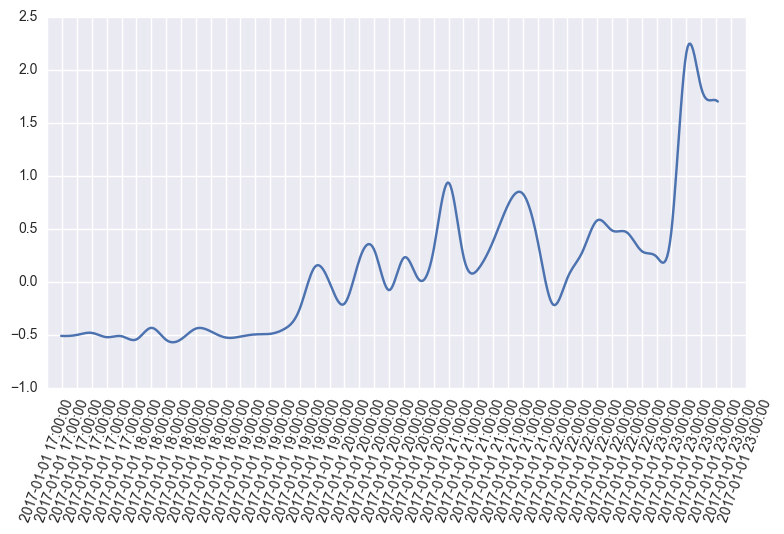

In [123]:
plt.plot(xn_ax, yn_cor(xn_ax))
plt.xticks(x_ax, x_axis[-48:], size='small', rotation=70)
plt.tight_layout()
plt.show

In [172]:
actual_output_test = np.array(actual_output_test)

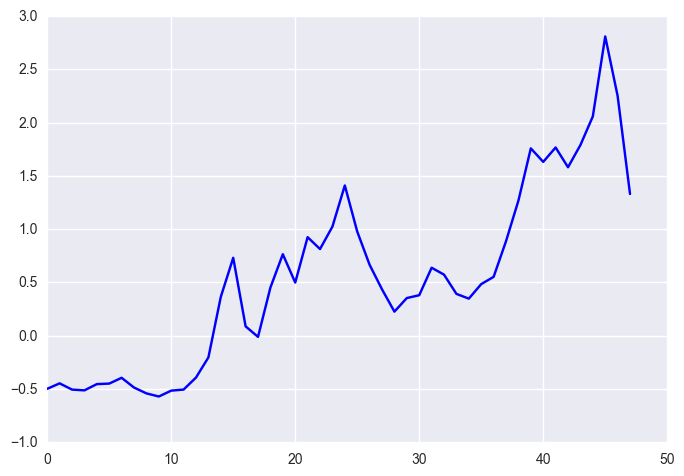

In [173]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( actual_output_test.reshape(48,1), 'b-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

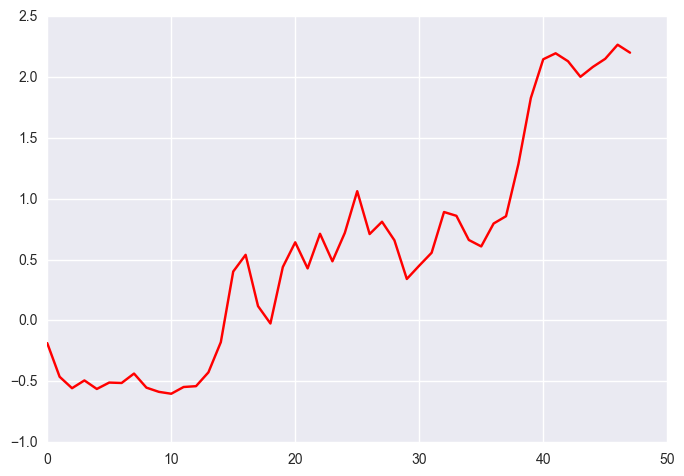

In [174]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( network_output_test.reshape(48,1), 'r-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()